In [16]:
import geopandas as gpd
#  import fiona
import leafmap.leafmap as leafmap 
import pandas as pd
import re
import os


In [17]:
df_ch = gpd.read_file("data/chf.geojson")
df_de = gpd.read_file("data/de.geojson")
df_de["country"] = "Germany"
df_ch["country"] = "Switzerland"
df_ch = df_ch[["country", "NAME_1", "geometry"]]
df_ch.columns = ["country", "state", "geometry"]
df_de = df_de[["country", "name", "geometry"]]
df_de.columns = ["country", "state", "geometry"]
df = pd.concat([df_ch, df_de])
en_list = ['Aargau', 'Appenzell Ausserrhoden', 'Appenzell Innerrhoden',
       'Basel', 'Basel', 'Bern', 'Fribourg', 'Geneva', 'Glarus',
       'Grisons', 'Jura', 'Lucerne', 'Neuchâtel', 'Nidwalden',
       'Obwalden', 'Sankt Gallen', 'Schaffhausen', 'Schwyz', 'Solothurn',
       'Thurgau', 'Ticino', 'Uri', 'Valais', 'Vaud', 'Zurich', 'Zug',
       'Baden-Württemberg', 'Bavaria', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hesse', 'Mecklenburg-Vorpommern', 'Lower Saxony',
       'North Rhine-Westphalia', 'Rhineland-Palatinate', 'Saarland',
       'Saxony-Anhalt', 'Saxony', 'Schleswig-Holstein', 'Thuringia']
df["state"] = en_list
df.to_file("data/germany_switzerland.geojson", driver="GeoJSON")

# prep data

## switzerlanmd

In [71]:
# BERTopic100CharMin2500CharMax_10ClassesNewestData

#BERTopic100CharMin2500CharMax_20
# class_name_dict = {'no_class':-1,
#             '0_medical': 0, 
#             '1_social_service_asylum': 1,
#             '2_education': 2,
#             '3_banking': 3,
#             '4_nail_beauty': 4,
#             '5_passport_information': 5,
#             '6_advertisement': 6,
#             '7_transport_CHF_UK': 7,
#             '8_war_related_content': 8,
#             '9_train_CHF': 9,
#             '10_accomodation':10,
#             '11_accomodation':11,
#             '12_hair_beauty' : 12,
#             '13_train_and_bus_travel':13,
#             '14_transport_UKR_CH':14,
#             '15_S_Status':15,
#             '16_dental_services':16,
#             '17_vet_food' : 17,
#             '18_weblinks' : 18,
#             '19_accomodation':19
#             }
class_name_dict = {-1:"no_class",
    0:"Medical Information",
    1:"Asylum Information", 
    2:"Veterinarian",
    3:"Banking",
    4:"Passport Information",
    5:"Transportation UKR CHF", 
    (6,7):"Integration Problems", #ukr/rus identity
    7:"Integration Problems%", #chat rules
    8:"Education",
    9:"Accomodation",
    10:"Train and Bus Transport Europe",
    11:"Dentistry Information",
    12:"Social Services",#social services weblinks
    13:"S Status Application",
    14:"Quality Refugee Camp",
    15:"Asylum Information%",
    16:"Social Services Canton Specific",
    17:"Transportation UKR CHF", #passenger
    18:"Train Bus Transport in Switzerland",
    19:"Personal Care", #hair beauty etc.
    20:"Employment Opportunities",
    21:"Accomodation", #focus on families
    22:"Social Services%",#social services geneva
    23:"Social Services%",
    24:"Vaccination"
}

class_name_dict = {-1:"no_class",
    0:"Medical Information",
    **dict.fromkeys([1, 13, 15], "Asylum Information and “S Permit” Application"),
    2:"Veterinarian",
    3:"Banking",
    4:"Consulate Services",
    **dict.fromkeys([5, 17], "Transportation between Ukraine and Switzerland"),
    **dict.fromkeys([6, 7], "Integration Problems"),
    8:"Education",
    9:"Accomodation",
    10:"Train and Bus Transport in Europe",
    11:"Dentistry Information",
    **dict.fromkeys([12, 16, 22, 23], "Social Services"),
    14:"Quality Refugee Camp",
    18:"Train Bus Transport in Switzerland",
    19:"Personal Care",
    20:"Employment Opportunities",
    21:"Accomodation", 
    24:"Vaccination"
}

canton_chat_dict = {'https://t.me/helpfulinfoforua': 'general',
 'https://t.me/ukraine_reborn': 'general',
 'https://t.me/BeautySwitzerland': 'general',
 'https://t.me/help_people_fromUkraine': 'general',
 'https://t.me/LousanneUkraine': 'Vaud',
 'https://t.me/LuzernUkraine': 'Lucerne',
 'https://t.me/ValaisUkraine': 'Valais',
 'https://t.me/ThurgauUkraine': 'Thurgau',
 'https://t.me/BielBienneUkraine': 'Bern',
 'https://t.me/fribourg1': 'Fribourg',
 'https://t.me/campax_ukraine_help_switzerland': 'general',
 'https://t.me/refugeesinSwitzerland': 'general',
 'https://t.me/zh_helps_ukraine': 'Zurich',
 'https://t.me/zh_helps_UArefugee': 'Zurich',
 'https://t.me/zurich_hb_help': 'Zurich',
 'https://t.me/zh_housing': 'Zurich',
 'https://t.me/helppetsfromukraine': 'general',
 'https://t.me/Zurich_UA': 'Zurich',
 'https://t.me/zh_helps_UArefugees': 'Zurich',
 'https://t.me/seep_helpukrainians': 'general',
 'https://t.me/Zh_helps_UA_mums': 'Zurich',
 'https://t.me/job_sw_ukrainians': 'general',
 'https://t.me/zh_back_ukraine': 'Zurich',
 'https://t.me/zh_helps_logistics': 'Zurich',
 'https://t.me/AargauUkraine': 'Aargau',
 'https://t.me/BernUkraine': 'Bern',
 'https://t.me/TicinoLuganoUkraine': 'Ticino',
 'https://t.me/UASchweiz': 'general',
 'https://t.me/SwissUA': 'general',
 'https://t.me/BaselUkraine': 'Basel',
 'https://t.me/ukrainer_basel': 'Basel',
 'https://t.me/GeneveUkraine': 'Genève',
 'https://t.me/StGallenUkraine': 'Sankt Gallen'}

import json 

f = open('../DGO/cities_in_canton/cities_in_canton.json')
  
# returns JSON object as 
# a dictionary
ciy_canton_dict = json.load(f)


In [68]:
test = "**Сайт Цюрихского университета, Центр стоматологической медицины**: ""У вас нет личного стоматолога? Мы будем рады уточнить у вас по телефону, считаются ли ваши жалобы неотложными. Пожалуйста, позвоните нам перед визитом: Номер телефона: 044 634 33 11 В ночное время (с 5:00 вечера до 8:00 утра), а также в выходные и праздничные дни: Пожалуйста, свяжитесь со службой неотложной помощи кантона Цюрих по телефону номер телефона 0800 33 66 55"". Website of the University Zürich, Zentrum für Zahnmedizin: ""You don’t have a personal dentist? We will be glad to clarify with you on the phone whether your complaints are considered to be an emergency. Please call us before your visit: Phone number: 044 634 33 11 At night (5:00 p.m. to 8:00 a.m.) and on weekends and public holidays: Please contact the emergency service of the Canton of Zurich on phone number 0800 33 66 55."

In [88]:
def check_key_in_string(string, dictionary):
    for key in dictionary:
        if key in string:
            return dictionary[key]
    return "general"

In [89]:
check_key_in_string(test, ciy_canton_dict)

'Zürich'

## Europe

In [52]:
class_name_dict = {'no_class':-1,
            'Medical Care': 0, 
            'Accomodation': 1,
            'Transport to and from Ukraine': 2,
            'Animal Welfare': 3,
            'Banking': 4,
            'Government Services and Asylum%%': 5,
            'Government Services and Asylum%': 6,
            'Public Transport within Europe': 7,
            'Government Services and Asylum': 8,
            'COVID-19 Vaccination': 9}
class_name_dict = {y: x for x, y in class_name_dict.items()}
country_chat_dict ={
            "Austria":"https://t.me/refugeesinAustria",
            "Belgium":"https://t.me/refugeesinBelgium",
            "Cyprus":"https://t.me/uacyprus",
            "Czech Republic":"https://t.me/dopomoga_cz",
            "Denmark":"https://t.me/Denmark_Ukraine",
            "France":"https://t.me/refugeesinFrance",
            "Germany":"https://t.me/refugees_in_Germany",
            "Greece":"https://t.me/help_ukranian_in_greece_chat",
            "Hungary":"https://t.me/helpukraine_hungary",
            "Ireland":"https://t.me/WelcomeIreland",
            "Italy":"https://t.me/Ukrainians_Italy",
            "Latvia":"https://t.me/ukrainelatvia",
            "Luxembourg":"https://t.me/helpforUkrainians_Luxemburg",
            "Netherlands":"https://t.me/dopomoganetherlands",
            "Poland":"https://t.me/refugeesinPoland",
            "Portugal":"https://t.me/toportugal",
            "Romania":"https://t.me/UkrainiansinRomania",
            "Slovakia":"https://t.me/ukrajinci_na_slovensku",
            "Spain":"https://t.me/espana_ucrania",
            "Sweden":"https://t.me/refugeesinSweden",
            "Switzerland":"https://t.me/refugeesinSwitzerland",
            "United Kingdom":"https://t.me/UA_England",
            "Moldova":"https://t.me/moldovaukraina"
            }
country_chat_dict = {y: x for x, y in country_chat_dict.items()}

# Prepare for App

In [18]:
import tiktoken
import pandas as pd
from tqdm import tqdm
import random 
tqdm.pandas()
encoding = "cl100k_base"
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [21]:
#News
df = pd.read_csv('/Users/kiliansprenkamp/Desktop/code/refugee_europe_unsupervised/models/BERTopicNewsHeadline25_min_cluster_50_stopwords/df_model.csv')
df = pd.read_csv('/Users/kiliansprenkamp/Desktop/code/refugee_europe_unsupervised/models/BERTopicNewsHeadline25_stopwords_Kmeans/df_model.csv')
class_name_dict = {
    **dict.fromkeys([1, 5, 9, 14, 16, 18], "no_class"),
    **dict.fromkeys([0, 10], "Current Information Refugees"),
    2: "Current Information War",
    **dict.fromkeys([3, 8, 22], "Problems Refugee Management"),
    **dict.fromkeys([4, 22], "Migration Apart from Ukraine"),
    6:"Sanktions Russia and War Strategy",
    7:"Children and Human Rights",
    **dict.fromkeys([11, 13, 20], "Volunteering and Donations"),
    **dict.fromkeys([12, 23, 24], "Local Communities"),
    **dict.fromkeys([15, 21], "Accomodation"),
    17:"Statements by the Church",
    19:"Refugee Routes from Ukraine",
}
df = df[df["alpha2_code"]!="AT"]
def alpha2_to_country(alpha2_code):
    if alpha2_code == "CH":
        return "Switzerland"
    if alpha2_code == "DE":
        return "Germany"

df = df[["title", "alpha2_code", "language_code", "date", "pred"]]
df.columns = ["text", "alpha2_code", "language_code", "date", "cluster"]

df["country"] = df["alpha2_code"].apply(alpha2_to_country)
df['cluster'] = df['cluster'].map(class_name_dict)
df = df[df.cluster!="no_class"]
df["tokens"] = df["text"].progress_apply(lambda x: num_tokens_from_string(x, encoding))
print("number tokens:", df["tokens"].sum())
print("cost" , df["tokens"].sum() * 0.0002/1000, "$")
df['state'] = df.apply(lambda x: random.choice(en_list), axis=1)
df.to_csv("data/df_news.csv", index=False)

100%|██████████| 22216/22216 [00:00<00:00, 51468.83it/s]


number tokens: 566931
cost 0.1133862 $


In [22]:
#twitter
df = pd.read_csv("data/df_twitterold.csv")
class_name_dict = {
    **dict.fromkeys([-1,3], "no_class"),
    **dict.fromkeys([1], "Current Information on Russia"),
    **dict.fromkeys([2, 23], "Negative Sentiment towards Refugees"),
    **dict.fromkeys([0, 13, 14, 24], "Current Information Refugees"),
    **dict.fromkeys([4, 20], "Accomodation"),
    **dict.fromkeys([5], "Education"),
    **dict.fromkeys([6], "Job Opportunities"),
    **dict.fromkeys([7, 12], "Situation in other European Countries"),
    **dict.fromkeys([8], "Donations, Volunteering and Help"),
    **dict.fromkeys([9], "Transportation"),
    **dict.fromkeys([10], "Bombing of Ukraine"),
    **dict.fromkeys([11, 21], "Refugees not from Ukraine"),
    **dict.fromkeys([15], "Cost of Refugees"),
    **dict.fromkeys([16, 17, 18, 19], "Violence and Racism against Refugees"),
}

def country_clean(query):
    if query == "Switzerland":
        return "Switzerland"
    if query == "Germany" or query == "Germany1" or query == "Germany2":
        return "Germany"

df["country"] = df["query"].apply(country_clean)
df = df[["country", "text", "created_at", "pred"]]
df.columns = ["country", "text", "date", "cluster"]
df['cluster'] = df['cluster'].map(class_name_dict)
df = df[df.cluster!="no_class"]
df["tokens"] = df["text"].progress_apply(lambda x: num_tokens_from_string(x, encoding))
print("number tokens:", df["tokens"].sum())
print("cost" , df["tokens"].sum() * 0.0002/1000, "$")
df['state'] = df.apply(lambda x: random.choice(en_list), axis=1)
df.to_csv("data/df_twitter.csv", index=False)

100%|██████████| 21204/21204 [00:00<00:00, 33209.40it/s]


number tokens: 887518
cost 0.1775036 $


In [20]:
df = pd.read_csv("/Users/kiliansprenkamp/Desktop/code/refugee_europe_unsupervised/models/BERTopicTelegramK25_drop_duplicates/df_model.csv")
class_name_dict = {-1:"no_class",
    0:"Medical Information",
    **dict.fromkeys([1, 21], "Immigration Procedure"),
    3:"Veterinarian and Vaccination",
    5:"Banking",
    6:"Social Services",
    **dict.fromkeys([4, 15], "Public Transport and Services"),
    **dict.fromkeys([2, 7, 14], "Accomodation"),
    **dict.fromkeys([9, 20, 11], "Integration"),
    **dict.fromkeys([8], "Asylum"),
    **dict.fromkeys([17], "Carriers, Transport to and from Ukraine"),
    12:"Interpretation and Translation Services",
    13:"Job and Development Opportunities",
    16:"Education",
    **dict.fromkeys([10,18], "Consulate Services"),
    19:"Transport personal Car",
    22:"Network Provider",
    23:"Dentistry Information",
    24:"Volunteering",
}
state = {'https://t.me/helpfulinfoforua': None,
 'https://t.me/ukraine_reborn': None,
 'https://t.me/BeautySwitzerland': None,
 'https://t.me/help_people_fromUkraine': None,
 'https://t.me/LousanneUkraine': 'Vaud',
 'https://t.me/LuzernUkraine': 'Lucerne',
 'https://t.me/WinterthurUkraine': 'Zurich',
 'https://t.me/ValaisUkraine': 'Valais',
 'https://t.me/ThurgauUkraine': 'Thurgau',
 'https://t.me/BielBienneUkraine': 'Bern',
 'https://t.me/fribourg1': 'Fribourg',
 'https://t.me/campax_ukraine_help_switzerland': None,
 'https://t.me/refugeesinSwitzerland': None,
 'https://t.me/zh_helps_ukraine': 'Zurich',
 'https://t.me/zh_helps_UArefugee': 'Zurich',
 'https://t.me/zurich_hb_help': 'Zurich',
 'https://t.me/zh_housing': 'Zurich',
 'https://t.me/helppetsfromukraine': None,
 'https://t.me/Zurich_UA': 'Zurich',
 'https://t.me/zh_helps_UArefugees': 'Zurich',
 'https://t.me/seep_helpukrainians': None,
 'https://t.me/Zh_helps_UA_mums': 'Zurich',
 'https://t.me/job_sw_ukrainians': None,
 'https://t.me/zh_back_ukraine': 'Zurich',
 'https://t.me/zh_helps_logistics': 'Zurich',
 'https://t.me/AargauUkraine': 'Aargau',
 'https://t.me/BernUkraine': 'Bern',
 'https://t.me/TicinoLuganoUkraine': 'Ticino',
 'https://t.me/UASchweiz': None,
 'https://t.me/SwissUA': None,
 'https://t.me/BaselUkraine': 'Basel',
 'https://t.me/ukrainer_basel': 'Basel',
 'https://t.me/GeneveUkraine': 'Geneva',
 'https://t.me/StGallenUkraine': 'Sankt Gallen',
 'https://t.me/UkrainianSwitzerland': None,
 'https://t.me/goodbern': "Bern",
 'https://t.me/IntegrationBernCH': "Bern",
 "https://t.me/refugees_in_Germany":None,
 "https://t.me/germanyhelpsukraine":None,
 "https://t.me/ukrainehelpberlin":"Berlin",
 "https://t.me/help_in_Nuremberg_UA":"Bavaria",
 "https://t.me/helpUkraine_Gemany":None,
 "https://t.me/hamburg_hilft":"Hamburg",
 'https://t.me/UkrainerInBasel': 'Basel',
 "https://t.me/cologne_help":"North Rhine-Westphalia",
 "https://t.me/Rostock_Ukraine":"Mecklenburg-Vorpommern",
 "https://t.me/work_ukr_berlin":"Berlin",
 "https://t.me/ukc_munich_volunteer":"Bavaria",
 "https://t.me/hamburg_help":"Hamburg",
 "https://t.me/bielefeldhelps":"North Rhine-Westphalia",
 "https://t.me/SolidarityUkraineBremen":"Bremen",
 "https://t.me/suport_ukraine_in_bremen":"Bremen",
 "https://t.me/pomosh_Germany_Chemnitz_Ukraine":"Saxony",
 "https://t.me/duisburgukraine":"North Rhine-Westphalia",
 "https://t.me/ukr_de_essen":"North Rhine-Westphalia",
 "https://t.me/KasselUkrainehilfen":"Hesse",
 "https://t.me/ukraine_helfen_mainz":"Rhineland-Palatinate",
 "https://t.me/ukrainerinleipzig":"Saxony",
 "https://t.me/ukraine_karlsruhe":"Baden-Württemberg",
 "https://t.me/uahelpkoelnanzeigen":"North Rhine-Westphalia",
 "https://t.me/accomodation_leipzig_ukraine":"Saxony",
 "https://t.me/accomodationsunday":None,
 "https://t.me/ukrainerinleipzig":"Saxony",
 "https://t.me/paderbornhelpsukr":"North Rhine-Westphalia",
 "https://t.me/UA_Paderborn":"North Rhine-Westphalia",
 "https://t.me/HelpUKR_Mainz":"Rhineland-Palatinate",
 "https://t.me/duisburgukraine":"North Rhine-Westphalia"
 }
country = {'https://t.me/helpfulinfoforua': "Switzerland",
 'https://t.me/ukraine_reborn': "Switzerland",
 'https://t.me/BeautySwitzerland': "Switzerland",
 'https://t.me/help_people_fromUkraine': "Switzerland",
 'https://t.me/LousanneUkraine': 'Switzerland',
 'https://t.me/LuzernUkraine': 'Switzerland',
 'https://t.me/ValaisUkraine': 'Switzerland',
 'https://t.me/WinterthurUkraine': 'Switzerland',
 'https://t.me/ThurgauUkraine': 'Switzerland',
 'https://t.me/BielBienneUkraine': 'Switzerland',
 'https://t.me/fribourg1': 'Switzerland',
 'https://t.me/campax_ukraine_help_switzerland': "Switzerland",
 'https://t.me/refugeesinSwitzerland': "Switzerland",
 'https://t.me/zh_helps_ukraine': 'Switzerland',
 'https://t.me/zh_helps_UArefugee': 'Switzerland',
 'https://t.me/zurich_hb_help': 'Switzerland',
 'https://t.me/zh_housing': 'Switzerland',
 'https://t.me/helppetsfromukraine': 'Switzerland',
 'https://t.me/Zurich_UA': 'Switzerland',
 'https://t.me/zh_helps_UArefugees': 'Switzerland',
 'https://t.me/seep_helpukrainians': 'Switzerland',
 'https://t.me/Zh_helps_UA_mums': 'Switzerland',
 'https://t.me/job_sw_ukrainians': 'Switzerland',
 'https://t.me/zh_back_ukraine': 'Switzerland',
 'https://t.me/zh_helps_logistics': 'Switzerland',
 'https://t.me/AargauUkraine': 'Switzerland',
 'https://t.me/BernUkraine': 'Switzerland',
 'https://t.me/TicinoLuganoUkraine': 'Switzerland',
 'https://t.me/UASchweiz': 'Switzerland',
 'https://t.me/SwissUA': 'Switzerland',
 'https://t.me/BaselUkraine': 'Switzerland',
 'https://t.me/ukrainer_basel': 'Switzerland',
 'https://t.me/GeneveUkraine': 'Switzerland',
 'https://t.me/StGallenUkraine': 'Switzerland',
 'https://t.me/UkrainianSwitzerland': 'Switzerland',
 'https://t.me/UkrainerInBasel': 'Switzerland',
 'https://t.me/goodbern': "Switzerland",
 'https://t.me/IntegrationBernCH': "Switzerland",
 "https://t.me/refugees_in_Germany":'Germany',
 "https://t.me/germanyhelpsukraine":'Germany',
 "https://t.me/ukrainehelpberlin":"Germany",
 "https://t.me/help_in_Nuremberg_UA":"Germany",
 "https://t.me/helpUkraine_Gemany":'Germany',
 "https://t.me/hamburg_hilft":"Germany",
 "https://t.me/cologne_help":"Germany",
 "https://t.me/Rostock_Ukraine":"Germany",
 "https://t.me/work_ukr_berlin":"Germany",
 "https://t.me/ukc_munich_volunteer":"Germany",
 "https://t.me/hamburg_help":"Germany",
 "https://t.me/bielefeldhelps":"Germany",
 "https://t.me/SolidarityUkraineBremen":"Germany",
 "https://t.me/suport_ukraine_in_bremen":"Germany",
 "https://t.me/pomosh_Germany_Chemnitz_Ukraine":"Germany",
 "https://t.me/duisburgukraine":"Germany",
 "https://t.me/ukr_de_essen":"Germany",
 "https://t.me/KasselUkrainehilfen":"Germany",
 "https://t.me/ukraine_helfen_mainz":"Germany",
 "https://t.me/ukrainerinleipzig":"Germany",
 "https://t.me/ukraine_karlsruhe":"Germany",
 "https://t.me/uahelpkoelnanzeigen":"Germany",
 "https://t.me/accomodation_leipzig_ukraine":"Germany",
 "https://t.me/accomodationsunday":'Germany',
 "https://t.me/ukrainerinleipzig":"Germany",
 "https://t.me/paderbornhelpsukr":"Germany",
 "https://t.me/UA_Paderborn":"Germany",
 "https://t.me/HelpUKR_Mainz":"Germany",
 "https://t.me/duisburgukraine":"Germany"
 }
df["cluster"] = df["pred"].apply(lambda x: class_name_dict[x])
df["state"] = df["chat"].apply(lambda x: state[x])
df["country"] = df["chat"].apply(lambda x: country[x])
df = df[["country", 'messageDatetime', 'messageText', "cluster", "state"]]
df.columns = ["country", "date", "text", "cluster", "state"]
df = df[df["cluster"]!="no_class"]
df['date'] = pd.to_datetime(df['date'], utc=True).dt.date
df["tokens"] = df["text"].progress_apply(lambda x: num_tokens_from_string(x, encoding))
print("number tokens:", df["tokens"].sum())
print("cost" , df["tokens"].sum() * 0.0002/1000, "$")
df.to_csv("data/df_telegram.csv", index=False)

100%|██████████| 369609/369609 [00:14<00:00, 25967.74it/s]


number tokens: 23930853
cost 4.7861706 $


In [11]:
def country_clean(query):
    if query == "Switzerland":
        return "Switzerland"
    if query == "Germany" or query == "Germany1" or query == "Germany2":
        return "Germany"
    

In [9]:
df_model = pd.read_csv("../models/BERTopic/news_k25/df_model.csv")
df_date = pd.read_csv("../models/BERTopic/news_k25/googleNews.csv")

In [22]:
df_telegram = pd.read_csv("../models/BERTopic/telegram_k25/df_model.csv")

In [27]:
df_telegram = df_telegram[df_telegram.cluster!= -1]

In [32]:
df_twitter

query                   id  \
0       Austria  1621554449251549184   
1       Austria  1621510075717398529   
2       Austria  1621489878847332353   
3       Austria  1621481782062325762   
4       Austria  1621427724098174978   
...         ...                  ...   
500566  Ukraine  1494238619388817409   
500567  Ukraine  1494238157000351746   
500568  Ukraine  1492609691481952261   
500569  Ukraine  1490266517463658496   
500570  Ukraine  1486732814317867016   

                                                     text  \
0       RT @tanjamaier17: A man just wrote me from Kyi...   
1       🇦🇹🇺🇦 Zelensky imposed new sanctions against Au...   
2       @MuscalR @StarskyUA I am in Austria and this c...   
3       (15) Falschinfos rund um ukrainische Geflüchte...   
4       A man just wrote me from Kyiv. His wife lived ...   
...                                                   ...   
500566   @nypost #UkraineConflict #StandWithUkraine #H...   
500567  @DoreeLewak @nypost  #UkraineConflict #StandWi...   
500568  Yes, war is a terrible thing. I hope there's n...   
500569  Economic side of the war: In case of Russian i...   
500570  (Спливли моторошні деталі трагедії на Житомирщ...   

         edit_history_tweet_ids                created_at  cluster  
0       ['1621554449251549184']  2023-02-03T17:01:22.000Z     -1.0  
1       ['1621510075717398529']  2023-02-03T14:05:02.000Z     -1.0  
2       ['1621489878847332353']  2023-02-03T12:44:47.000Z     24.0  
3       ['1621481782062325762']  2023-02-03T12:12:37.000Z     -1.0  
4       ['1621427724098174978']  2023-02-03T08:37:48.000Z     -1.0  
...                         ...                       ...      ...  
500566  ['1494238619388817409']  2022-02-17T09:13:43.000Z     19.0  
500567  ['1494238157000351746']  2022-02-17T09:11:52.000Z      2.0  
500568  ['1492609691481952261']  2022-02-12T21:20:56.000Z     23.0  
500569  ['1490266517463658496']  2022-02-06T10:10:00.000Z     -1.0  
500570  ['1486732814317867016']  2022-01-27T16:08:19.000Z     -1.0  

[500571 rows x 6 columns]

In [33]:
df_twitter.cluster.unique()

array([-1., 24.,  1.,  0.,  4., 15., 17., 19.,  2., 23., 10.,  3., 11.,
       14., 12.,  5., 13., 20.,  9.,  6., 16., 21.,  8., 18.,  7., 22.,
       nan])

In [98]:
df['region'] = df['chat'].apply(lambda x: canton_chat_dict[x])

In [95]:
df['region'] = df['messageText'].apply(lambda x: check_key_in_string(x, ciy_canton_dict))

In [90]:
path = "../models/BERTopic100CharMin2500CharMax_25Classes_dropDuplicates/df.csv"

def count_reaction(reaction):
    if isinstance(reaction, str):
        m = re.findall('count=(.+?),', reaction)
        m = [int(x) for x in m]
        return sum(m)
    else:
        return float(0)

def prep_data(path, class_name_dict,canton_chat_dict,ciy_canton_dict):
    df = pd.read_csv(path)
    df = df[df.cluster!=-1]
    df['uniqueIdentifier'] = df.apply(lambda x: x["chat"] + "_" + str(x["messageID"]), axis=1)
    df['uniqueIdentifierReply'] = df.apply(lambda x: x["chat"] + "_" + str(x["messageReplyID"])[:-2], axis=1)
    df['cluster_names'] = df['cluster'].apply(lambda x: class_name_dict[x])
    df['region'] = df['messageText'].apply(lambda x: check_key_in_string(x, ciy_canton_dict))
    df['region'] = df['chat'].apply(lambda x: canton_chat_dict[x])
    df['week']=df['messageDatetime'].apply(lambda x: pd.to_datetime(x).isocalendar()[1])
    # df=df[df["week"]>=8]
    df["reaction_count"] = df.apply(lambda x: count_reaction(x.messageReactions), axis=1)
    df.to_csv(path.split(".csv")[0] + "_prepfinal.csv", index=False)

prep_data(path, class_name_dict, canton_chat_dict,ciy_canton_dict)


## Translation

In [9]:
import deepl 
DEEPL_API_KEY = os.getenv("DEEPL_API_KEY")
translator = deepl.Translator(DEEPL_API_KEY) 
result = translator.translate_text(df.messageText[0], target_lang="EN-US")
print(result)

📄 Zahistu Status S Protection Status S Status S https://helpful.redcross.ch/uk/priyizd/status-perebuvannya-status-zakhistu-s


In [12]:
df

chat  messageSender  messageID  \
0      https://t.me/helpfulinfoforua  -1.001633e+12         20   
1        https://t.me/ukraine_reborn  -1.001719e+12       1578   
2        https://t.me/ukraine_reborn  -1.001719e+12       1567   
3        https://t.me/ukraine_reborn  -1.001719e+12       1551   
4        https://t.me/ukraine_reborn  -1.001719e+12       1517   
...                              ...            ...        ...   
65149   https://t.me/StGallenUkraine   1.351065e+09         82   
65150   https://t.me/StGallenUkraine   8.570466e+08         79   
65151   https://t.me/StGallenUkraine   1.842924e+09         72   
65152   https://t.me/StGallenUkraine   1.351065e+09         70   
65153   https://t.me/StGallenUkraine   9.372956e+08         59   

       messageReplyID            messageDatetime  messageViews  \
0                 NaN  2022-07-14 05:09:19+00:00        4786.0   
1                 NaN  2022-11-21 21:17:29+00:00         640.0   
2                 NaN  2022-11-19 12:59:10+00:00         712.0   
3                 NaN  2022-11-18 14:15:48+00:00         947.0   
4                 NaN  2022-11-14 11:33:49+00:00         610.0   
...               ...                        ...           ...   
65149            80.0  2022-03-21 09:32:52+00:00           NaN   
65150             NaN  2022-03-21 09:29:20+00:00           NaN   
65151            70.0  2022-03-21 09:24:23+00:00           NaN   
65152            56.0  2022-03-21 09:22:01+00:00           NaN   
65153             NaN  2022-03-21 08:31:41+00:00           NaN   

       messageForwards                                   messageReactions  \
0                  9.0  MessageReactions(results=[ReactionCount(reacti...   
1                 11.0  MessageReactions(results=[ReactionCount(reacti...   
2                  0.0                                                NaN   
3                  3.0  MessageReactions(results=[ReactionCount(reacti...   
4                  3.0  MessageReactions(results=[ReactionCount(reacti...   
...                ...                                                ...   
65149              NaN                                                NaN   
65150              NaN  MessageReactions(results=[ReactionCount(reacti...   
65151              NaN                                                NaN   
65152              NaN                                                NaN   
65153              NaN                                                NaN   

                                             messageText  cluster  \
0      📄 Статус захисту S Статус защиты S Status S ht...       12   
1      Информаційна сесія з питань житла - Женева Сер...       22   
2      **Арт-терапія для дітей. Женева ** Арт-терапія...       12   
3      **Арт студія для дітей. Женева ** Нагадуємо, щ...       12   
4      **Салон шукає 2-3 перукарів (перевага українка...       19   
...                                                  ...      ...   
65149  В амбулатории Вам не помогут. Я только что туд...        0   
65150  Я считаю если зарегистрированы в Роршах, то на...        0   
65151  Нету разницы есть статус или нету, в больницу ...        0   
65152  Добрый день, если Вы уже подали документы на с...        1   
65153  Здравствуйте, мы ищем квартира в St.Gallen, Ro...        9   

                       uniqueIdentifier            uniqueIdentifierReply  \
0      https://t.me/helpfulinfoforua_20  https://t.me/helpfulinfoforua_n   
1      https://t.me/ukraine_reborn_1578    https://t.me/ukraine_reborn_n   
2      https://t.me/ukraine_reborn_1567    https://t.me/ukraine_reborn_n   
3      https://t.me/ukraine_reborn_1551    https://t.me/ukraine_reborn_n   
4      https://t.me/ukraine_reborn_1517    https://t.me/ukraine_reborn_n   
...                                 ...                              ...   
65149   https://t.me/StGallenUkraine_82  https://t.me/StGallenUkraine_80   
65150   https://t.me/StGallenUkraine_79   https://t.me/StGallenUkraine_n   
65151   

In [56]:
df_translate = pd.DataFrame(columns=df.columns)
for region in df.region.unique():
    for cluster in df.cluster_names.unique():
        df_translate = pd.concat([df_translate, df[(df.region==region)&(df.cluster_names==cluster)].sort_values("reaction_count").head(3)],axis=0)
        df_translate = pd.concat([df_translate, df[(df.region==region)&(df.cluster_names==cluster)].sort_values("reaction_count",ascending=False).head(3)],axis=0)
df_translate.drop_duplicates(inplace=True)

In [57]:
sum(df_translate.messageText.str.len())

414382

In [58]:
from tqdm import tqdm
tqdm.pandas()
df_translate['messageTextEnglish'] = df_translate["messageText"].progress_apply(lambda x: translator.translate_text(x, target_lang="EN-US"))

100%|██████████| 1459/1459 [09:35<00:00,  2.53it/s]


In [69]:
df = df.merge(df_translate.messageTextEnglish,right_index=True,left_index=True,how="outer")

In [71]:
df[~df.messageTextEnglish.isnull()]

chat  messageSender  messageID  \
28     https://t.me/help_people_fromUkraine  -1.001606e+12         93   
31     https://t.me/help_people_fromUkraine  -1.001606e+12         85   
37             https://t.me/LousanneUkraine   3.032380e+08      38582   
40             https://t.me/LousanneUkraine   9.280426e+08      38563   
41             https://t.me/LousanneUkraine   5.616613e+09      38562   
...                                     ...            ...        ...   
65091          https://t.me/StGallenUkraine   7.622466e+08       1269   
65111          https://t.me/StGallenUkraine   5.116123e+09        829   
65124          https://t.me/StGallenUkraine   3.542427e+08        597   
65134          https://t.me/StGallenUkraine   1.772162e+09        423   
65138          https://t.me/StGallenUkraine   1.190275e+08        339   

       messageReplyID            messageDatetime  messageViews  \
28                NaN  2022-04-16 23:41:02+00:00        3671.0   
31                NaN  2022-04-10 12:30:49+00:00        3012.0   
37            38580.0  2022-11-24 15:37:37+00:00           NaN   
40                NaN  2022-11-24 08:25:57+00:00           NaN   
41            38447.0  2022-11-24 07:47:10+00:00           NaN   
...               ...                        ...           ...   
65091             NaN  2022-03-30 14:10:25+00:00           NaN   
65111             NaN  2022-03-27 13:18:51+00:00           NaN   
65124             NaN  2022-03-26 09:41:54+00:00           NaN   
65134           419.0  2022-03-25 17:49:46+00:00           NaN   
65138           337.0  2022-03-25 07:14:01+00:00           NaN   

       messageForwards                                   messageReactions  \
28                 5.0                                                NaN   
31                 6.0  MessageReactions(results=[], min=False, can_se...   
37                 NaN                                                NaN   
40                 NaN                                                NaN   
41                 NaN                                                NaN   
...                ...                                                ...   
65091              NaN  MessageReactions(results=[ReactionCount(reacti...   
65111              NaN                                                NaN   
65124              NaN                                                NaN   
65134              NaN                                                NaN   
65138              NaN  MessageReactions(results=[ReactionCount(reacti...   

                                             messageText  cluster  \
28     17. Раздел о медицине, медицинской страховке, ...        0   
31       15б. Работа: поиски работы, реклама своих услуг       20   
37     Со второго месяца работы самостоятельно оплачи...        0   
40                         https://t.me/SolothurnUkraine       12   
41     Доброе утро! Именно лагеря? Лагеря по этому ад...        1   
...                                                  ...      ...   
65091  Я нікого не принижую. Просто із-за таких (а їх...       15   
65111  Подскажите, приехала Мама с сыном , нужно жиль...        9   
65124  доброго дня можливо хтось знає про перевезення...        2   
65134                                     И какая школа?        8   
65138  Приглашение пришло на электронную почту. По ме...       13   

                              uniqueIdentifier  \
28     https://t.me/help_people_fromUkraine_93   
31     https://t.me/help_people_fromUkraine_85   
37          https://t.me/LousanneUkraine_38582   
40          https://t.me/LousanneUkraine_38563   
41          https://t.me/LousanneUkraine_38562   
...                                        ...   
65091        https://t.me/StGallenUkraine_1269   
65111         https://t.me/StGallenUkraine_829   
65124         https://t.me/StGallenUkraine_597   
65134         https://t.me/StGallenUkraine_423   
65138         https://t.me/StGallenUkraine_339   

              

In [60]:
sum(df_translate.messageText.str.len())

414382

In [79]:
df.to_csv("../models/BERTopic100CharMin2500CharMax_25Classes_dropDuplicates/df_prep2.csv", index=False)

In [77]:
df.loc[df.region=="general", "region"] = "all Cantons"

In [78]:
df

chat  messageSender  messageID  \
0      https://t.me/helpfulinfoforua  -1.001633e+12         20   
1        https://t.me/ukraine_reborn  -1.001719e+12       1578   
2        https://t.me/ukraine_reborn  -1.001719e+12       1567   
3        https://t.me/ukraine_reborn  -1.001719e+12       1551   
4        https://t.me/ukraine_reborn  -1.001719e+12       1517   
...                              ...            ...        ...   
65149   https://t.me/StGallenUkraine   1.351065e+09         82   
65150   https://t.me/StGallenUkraine   8.570466e+08         79   
65151   https://t.me/StGallenUkraine   1.842924e+09         72   
65152   https://t.me/StGallenUkraine   1.351065e+09         70   
65153   https://t.me/StGallenUkraine   9.372956e+08         59   

       messageReplyID            messageDatetime  messageViews  \
0                 NaN  2022-07-14 05:09:19+00:00        4786.0   
1                 NaN  2022-11-21 21:17:29+00:00         640.0   
2                 NaN  2022-11-19 12:59:10+00:00         712.0   
3                 NaN  2022-11-18 14:15:48+00:00         947.0   
4                 NaN  2022-11-14 11:33:49+00:00         610.0   
...               ...                        ...           ...   
65149            80.0  2022-03-21 09:32:52+00:00           NaN   
65150             NaN  2022-03-21 09:29:20+00:00           NaN   
65151            70.0  2022-03-21 09:24:23+00:00           NaN   
65152            56.0  2022-03-21 09:22:01+00:00           NaN   
65153             NaN  2022-03-21 08:31:41+00:00           NaN   

       messageForwards                                   messageReactions  \
0                  9.0  MessageReactions(results=[ReactionCount(reacti...   
1                 11.0  MessageReactions(results=[ReactionCount(reacti...   
2                  0.0                                                NaN   
3                  3.0  MessageReactions(results=[ReactionCount(reacti...   
4                  3.0  MessageReactions(results=[ReactionCount(reacti...   
...                ...                                                ...   
65149              NaN                                                NaN   
65150              NaN  MessageReactions(results=[ReactionCount(reacti...   
65151              NaN                                                NaN   
65152              NaN                                                NaN   
65153              NaN                                                NaN   

                                             messageText  cluster  \
0      📄 Статус захисту S Статус защиты S Status S ht...       12   
1      Информаційна сесія з питань житла - Женева Сер...       22   
2      **Арт-терапія для дітей. Женева ** Арт-терапія...       12   
3      **Арт студія для дітей. Женева ** Нагадуємо, щ...       12   
4      **Салон шукає 2-3 перукарів (перевага українка...       19   
...                                                  ...      ...   
65149  В амбулатории Вам не помогут. Я только что туд...        0   
65150  Я считаю если зарегистрированы в Роршах, то на...        0   
65151  Нету разницы есть статус или нету, в больницу ...        0   
65152  Добрый день, если Вы уже подали документы на с...        1   
65153  Здравствуйте, мы ищем квартира в St.Gallen, Ro...        9   

                       uniqueIdentifier            uniqueIdentifierReply  \
0      https://t.me/helpfulinfoforua_20  https://t.me/helpfulinfoforua_n   
1      https://t.me/ukraine_reborn_1578    https://t.me/ukraine_reborn_n   
2      https://t.me/ukraine_reborn_1567    https://t.me/ukraine_reborn_n   
3      https://t.me/ukraine_reborn_1551    https://t.me/ukraine_reborn_n   
4      https://t.me/ukraine_reborn_1517    https://t.me/ukraine_reborn_n   
...                                 ...                              ...   
65149   https://t.me/StGallenUkraine_82  https://t.me/StGallenUkraine_80   
65150   https://t.me/StGallenUkraine_79   https://t.me/StGallenUkraine_n   
65151   

In [18]:
df[(df.region==region)&(df.cluster_names==cluster)].sort_values("reaction_count").head() = df[(df.region==region)&(df.cluster_names==cluster)].sort_values("reaction_count").head()

chat  messageSender  messageID  messageReplyID  \
64500  https://t.me/StGallenUkraine   1.225067e+09       9245             NaN   
65048  https://t.me/StGallenUkraine   3.165190e+08       1839          1838.0   
65006  https://t.me/StGallenUkraine   7.031005e+08       2608          2578.0   
65000  https://t.me/StGallenUkraine   6.234234e+08       2735          2524.0   
64969  https://t.me/StGallenUkraine   7.713338e+08       3099          3093.0   

                 messageDatetime  messageViews  messageForwards  \
64500  2022-06-17 13:03:53+00:00           NaN              NaN   
65048  2022-04-04 13:19:37+00:00           NaN              NaN   
65006  2022-04-11 10:58:56+00:00           NaN              NaN   
65000  2022-04-12 12:58:50+00:00           NaN              NaN   
64969  2022-04-15 13:24:15+00:00           NaN              NaN   

      messageReactions                                        messageText  \
64500              NaN  Привет, Ребята! Кто в Госсау жил? Это распреде...   
65048              NaN                А живёте вы у кого-то или в лагере?   
65006              NaN                                В лагерь какой-то?)   
65000              NaN  There are still some seats left for the hike t...   
64969              NaN  Скажите пожалуйста, вы в лагере, или отдельно....   

       cluster                   uniqueIdentifier  \
64500       14  https://t.me/StGallenUkraine_9245   
65048       14  https://t.me/StGallenUkraine_1839   
65006       14  https://t.me/StGallenUkraine_2608   
65000       14  https://t.me/StGallenUkraine_2735   
64969       14  https://t.me/StGallenUkraine_3099   

                   uniqueIdentifierReply         cluster_names        region  \
64500     https://t.me/StGallenUkraine_n  Quality Refugee Camp  Sankt Gallen   
65048  https://t.me/StGallenUkraine_1838  Quality Refugee Camp  Sankt Gallen   
65006  https://t.me/StGallenUkraine_2578  Quality Refugee Camp  Sankt Gallen   
65000  https://t.me/StGallenUkraine_2524  Quality Refugee Camp  Sankt Gallen   
64969  https://t.me/StGallenUkraine_3093  Quality Refugee Camp  Sankt Gallen   

       week  reaction_count  
64500    24             0.0  
65048    14             0.0  
65006    15             0.0  
65000    15             0.0  
64969    15             0.0

In [1]:
import deepl

auth_key = "5d173dbf-955e-0967-3053-a764cfc0be88:fx"  # Replace with your key
translator = deepl.Translator(auth_key)

result = translator.translate_text("Hello, world!", target_lang="FR")
print(result.text)  # "Bonjour, le monde !"

Bonjour, le monde !


In [8]:
translator.translate_text("Hello, world!", target_lang="FR")

AttributeError: 'Translator' object has no attribute 'translate_text'

# gpd & leafmap

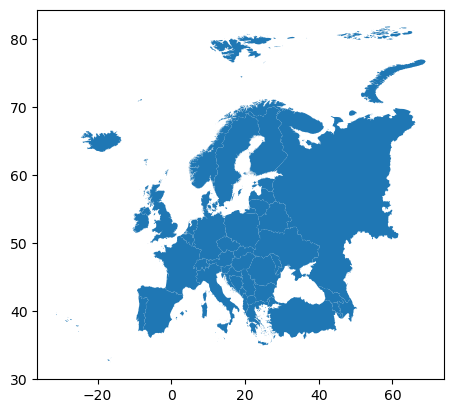

In [6]:
europe_shp = gpd.read_file('../data/geodata/shapefiles/europe/Europe.shp')
europe_shp.plot()
europe_shp.to_file("../data/geodata/geojson/europe.geojson", driver="GeoJSON")

In [10]:
gdf = gpd.read_file("../data/geodata/geojson/europe.geojson")

In [8]:
m = leafmap.Map()
m.add_gdf(gdf, layer_name="New York boroughs", fill_colors=["red", "green", "blue"])
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [13]:
gdf = gdf[~gdf.NAME.isin(["Faeroe Islands (Denmark)","Faeroe Islands (Denmark)","Russia","Jan Mayen (Norway)","Svalbard (Norway)"])]

In [17]:
gdf.to_file("../data/geodata/geojson/europe_mod_EU_contest.geojson", driver="GeoJSON")

In [ ]:
import leafmap
import geopandas as gpd

data = "https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/countries.geojson"
gdf = gpd.read_file(data)

m = leafmap.Map()
m.add_labels(data, "NAME", font_size="12pt", font_color="blue", font_family="arial", font_weight="bold")
m.add_gdf(gdf=gdf)
m

In [6]:
m = leafmap.Map(center=[40, -100], zoom=4)
cities = 'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/us_cities.csv'
regions = 'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/us_regions.geojson'

m.add_geojson(regions, layer_name='US Regions')
# m.add_points_from_xy(
#     cities,
#     x="longitude",
#     y="latitude",
#     color_column='region',
#     icon_names=['gear', 'map', 'leaf', 'globe'],
#     spin=True,
#     add_legend=True,
# )
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

<AxesSubplot:>

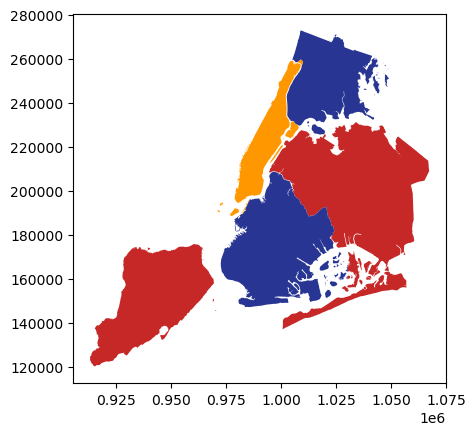

In [3]:
gdf = gpd.read_file(gpd.datasets.get_path('nybb'))
# adding a column with color names (gdf has 5 rows)
gdf['color'] = ['#C62828', '#C62828', '#283593', '#FF9800', '#283593']
gdf.plot(color=gdf['color'])  

In [49]:
gdf = gpd.read_file("../data/geodata/geojson/chf.geojson")

In [50]:
gdf

ID_0  ISO       NAME_0  ID_1                  NAME_1  \
0    223  CHE  Switzerland     1                  Aargau   
1    223  CHE  Switzerland     2  Appenzell Ausserrhoden   
2    223  CHE  Switzerland     3   Appenzell Innerrhoden   
3    223  CHE  Switzerland     4                   Basel   
4    223  CHE  Switzerland     5                   Basel   
5    223  CHE  Switzerland     6                    Bern   
6    223  CHE  Switzerland     7                Fribourg   
7    223  CHE  Switzerland     8                  Genève   
8    223  CHE  Switzerland     9                  Glarus   
9    223  CHE  Switzerland    10              Graubünden   
10   223  CHE  Switzerland    11                    Jura   
11   223  CHE  Switzerland    12                 Lucerne   
12   223  CHE  Switzerland    13               Neuchâtel   
13   223  CHE  Switzerland    14               Nidwalden   
14   223  CHE  Switzerland    15                Obwalden   
15   223  CHE  Switzerland    16            Sankt Gallen   
16   223  CHE  Switzerland    17            Schaffhausen   
17   223  CHE  Switzerland    18                  Schwyz   
18   223  CHE  Switzerland    19               Solothurn   
19   223  CHE  Switzerland    20                 Thurgau   
20   223  CHE  Switzerland    21                  Ticino   
21   223  CHE  Switzerland    22                     Uri   
22   223  CHE  Switzerland    23                  Valais   
23   223  CHE  Switzerland    24                    Vaud   
24   223  CHE  Switzerland    25                  Zürich   
25   223  CHE  Switzerland    26                     Zug   

                   TYPE_1 ENGTYPE_1 NL_NAME_1  \
0   Canton|Kanton|Chantun    Canton      None   
1   Canton|Kanton|Chantun    Canton      None   
2   Canton|Kanton|Chantun    Canton      None   
3   Canton|Kanton|Chantun    Canton      None   
4   Canton|Kanton|Chantun    Canton      None   
5   Canton|Kanton|Chantun    Canton      None   
6   Canton|Kanton|Chantun    Canton      None   
7   Canton|Kanton|Chantun    Canton      None   
8   Canton|Kanton|Chantun    Canton      None   
9   Canton|Kanton|Chantun    Canton      None   
10  Canton|Kanton|Chantun    Canton      None   
11  Canton|Kanton|Chantun    Canton      None   
12  Canton|Kanton|Chantun    Canton      None   
13  Canton|Kanton|Chantun    Canton      None   
14  Canton|Kanton|Chantun    Canton      None   
15  Canton|Kanton|Chantun    Canton      None   
16  Canton|Kanton|Chantun    Canton      None   
17  Canton|Kanton|Chantun    Canton      None   
18  Canton|Kanton|Chantun    Canton      None   
19  Canton|Kanton|Chantun    Canton      None   
20  Canton|Kanton|Chantun    Canton      None   
21  Canton|Kanton|Chantun    Canton      None   
22  Canton|Kanton|Chantun    Canton      None   
23  Canton|Kanton|Chantun    Canton      None   
24  Canton|Kanton|Chantun    Canton      None   
25  Canton|Kanton|Chantun    Canton      None   

                                            VARNAME_1  \
0                             Argovia|Arg¢via|Argovie   
1   Appenzell Ausser-Rhoden|Appenzell Outer Rhodes...   
2   Appenzell Inner-Rhoden|Appenzell Inner Rhodes|...   
3   Bâle-Campagne|Basel-Country|Baselland|Basel-La...   
4   Bâle-Ville|Basel-City|Basel-Town|Basilea-Citad...   
5                                         Berna|Berne   
6                           Freiburg|Friburg|Friburgo   
7   Cenevre|Genebra|Geneve|Geneva|Genevra|Genf|Gin...   
8                              Glaris|Glarona|Glaruna   
9                Graubünden|Grigioni|Grischun|Grisons   
10                                              Giura   
11                                     Lucerna|Luzern   
12                                          Neuenburg   
13       Nidvaldo|Nidwald|Unterwalden-le-Bas|Nidwaldo   
14  Obvaldo|Obwald|Unterwalden-le-Haut|Obwaldo|Sur...   
15                      Saint-Gall|San Gallo|Son Gagl   
16                    Schaffhouse|Schaffusa|Sciaffusa   
17                               

In [12]:
if canton_select=="all Cantons":
    m = leafmap.Map(center=[46.449212, 7.734375], zoom=7)
    m.add_gdf(gdf, layer_name="Swiss Cantons", fill_colors=["red"])
    m.to_streamlit()

geopandas.geodataframe.GeoDataFrame

In [13]:
regions

'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/us_regions.geojson'

In [3]:
path_to_data = gpd.datasets.get_path("nybb")
gdf = gpd.read_file(path_to_data)
gdf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [4]:
m = leafmap.Map()
m.add_gdf(gdf, layer_name="New York boroughs", fill_colors=["blue"])
m.add_gdf(gdf[gdf.BoroName=="Queens"], layer_name="choosen Canton", fill_colors=["red"])
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…